# Import Packet n Data

In [1]:
# Import packages
from datetime import datetime
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# VaR

In [ ]:
def VaR(prev_value, t, simulations):
  drift = df.AVG[t-1] - 0.5*df.VAR[t-1]
  random_values = np.random.standard_normal(simulations)*np.sqrt(df.VAR[t-1])
  end_value = prev_value * np.exp(drift + random_values)
  VaR70 = np.percentile(end_value, 30)
  VaR85 = np.percentile(end_value, 15)
  VaR99 = np.percentile(end_value, 1)
  df.at[t, 'VAR70'] =  VaR70
  df.at[t, 'VAR85'] =  VaR85
  df.at[t, 'VAR99'] =  VaR99


In [ ]:
simulations = 1000000
df=pd.read_csv("/content/drive/MyDrive/DSPROJECT/Data/AAPL.csv")
df.rename(columns = {'VAR95':'VAR70','VAR99':'VAR85','VAR999':'VAR99'}, inplace = True)
for index in range(64,949):
  VaR(df.AAPL[index-1],index,simulations)
df.to_csv("/content/drive/MyDrive/DSPROJECT/Data/AAPL.csv")

# Back Testing


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DSPROJECT/Data/YUM.csv")
percent70 = 0
percent85 = 0
percent99 = 0
for index in range(64,949):
  if(df.at[index,'VAR70']>df.at[index,'YUM']):
    percent70+=1
  if(df.at[index,'VAR85']>df.at[index,'YUM']):
    percent85+=1
  if(df.at[index,'VAR99']>df.at[index,'YUM']):
    percent99+=1
dfn=pd.read_csv("/content/drive/MyDrive/DSPROJECT/Backtest.csv")
dfn.at[49,'VaR70']=(percent70/886)*100
dfn.at[49,'VaR85']=(percent85/886)*100
dfn.at[49,'VaR99']=(percent99/886)*100
dfn = dfn.drop('Unnamed: 0', axis=1)
dfn.to_csv("/content/drive/MyDrive/DSPROJECT/Backtest.csv")
dfn

,STOCK,days,VaR70,VaR85,VaR99
0,American Airlines,886.0,15.575621,3.160271,0.112867
1,Apple,886.0,19.638826,8.126411,0.564334
2,Allstate,886.0,19.300226,4.966140,0.902935
3,AMD,886.0,24.717833,9.932280,1.128668
4,Amazon,886.0,26.749436,12.528217,1.805869
...,...,...,...,...,...
944,NaN,NaN,NaN,NaN,NaN
945,NaN,NaN,NaN,NaN,NaN
946,NaN,NaN,NaN,NaN,NaN
947,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DSPROJECT/Data/AAL.csv")
df

,Unnamed: 0.1,Unnamed: 0,Date,AAL,PDR,VAR,AVG,VAR60,VAR80,VAR85,VAR70,VAR99
0,0,0,1/2/2020,29.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1/3/2020,27.650000,-0.050769,0.000000,-0.050769,NaN,NaN,NaN,NaN,NaN
2,2,2,1/6/2020,27.320000,-0.012007,0.000376,-0.031388,NaN,NaN,NaN,NaN,NaN
3,3,3,1/7/2020,27.219999,-0.003667,0.000421,-0.022148,NaN,NaN,NaN,NaN,NaN
4,4,4,1/8/2020,27.840000,0.022522,0.000690,-0.010980,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
944,944,944,10/3/2023,12.290000,-0.036745,0.001748,-0.000913,12.593418,12.286957,12.190013,12.453251,11.548998
945,945,945,10/4/2023,12.730000,0.035175,0.001748,-0.000875,12.138852,11.842736,11.747953,12.002401,11.128975
946,946,946,10/5/2023,12.850000,0.009382,0.001746,-0.000864,12.574047,12.269474,12.168527,12.432198,11.530472
947,947,947,10/6/2023,12.760000,-0.007029,0.001744,-0.000870,12.693177,12.385780,12.282956,12.548737,11.637309


# Data visualizing

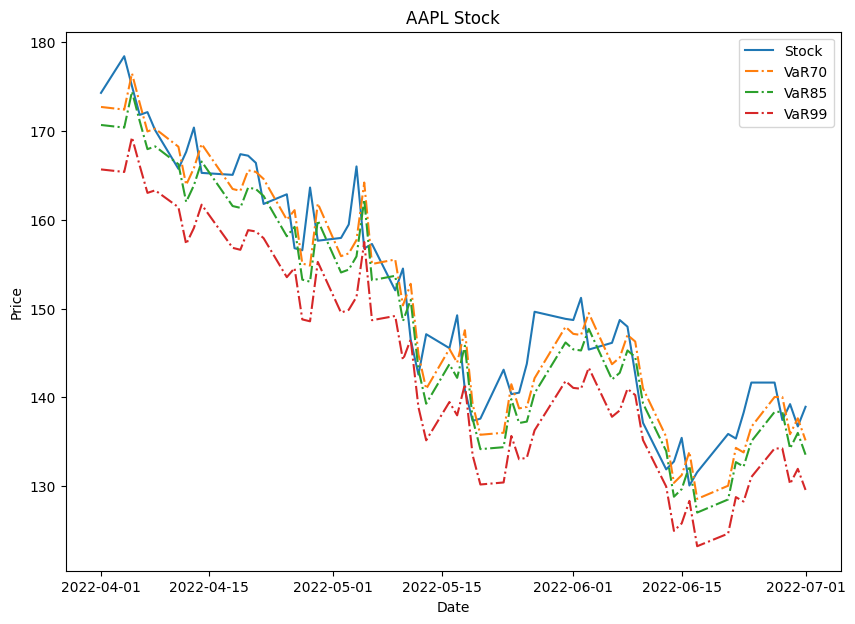

In [8]:
df=pd.read_csv("/content/drive/MyDrive/DSPROJECT/Data/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[(df['Date'] >= '4-1-2022') & (df['Date'] <= '7-1-2022')]

# Extract data for plotting
x = filtered_df['Date']
y0 = filtered_df['AAPL']
y1 = filtered_df['VAR70']
y2 = filtered_df['VAR85']
y3 = filtered_df['VAR99']

#x = df.Date
#y0 = df.AAL
#y1 = df.VAR70
#y2 = df.VAR85
#y3 = df.VAR99
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.plot(x, y0, label ='Stock')
plt.plot(x, y1, '-.', label ='VaR70')
plt.plot(x, y2, '-.', label ='VaR85')
plt.plot(x, y3, '-.', label ='VaR99')

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('AAPL Stock')
plt.savefig('/content/drive/MyDrive/DSPROJECT/Plot/AAPL6m.png', bbox_inches='tight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
